# 监督学习专题 —— 回归

回归：统计学分析数据的方法，目的在于了解两个或多个变数间是否相关

研究其相关方向与强度，

并建立数学模型以便观察特定变数来预测研究者感兴趣的变数。

回归分析可以帮助人们了解在自变量变化时因变量的变化量。

一般来说，通过回归分析我们可以由给出的自变量估计因变量的条件期望。

### sklearn 的回归

Sklearn提供的回归函数主要被封装在两个子模块中，分别是sklearn.linear_model和sklearn.preprocessing。

sklearn.linear_modlel封装的是一些线性函数，线性回归函数包括有：

    • 普通线性回归函数（ LinearRegression ）
    • 岭回归（Ridge）
    • Lasso（Lasso）
非线性回归函数，如多项式回归（PolynomialFeatures）则通过
sklearn.preprocessing 子模块进行调用

#### 应用

回归方法适合对一些带有时序信息的数据进行预测或者趋势拟合，常用在金融及其他涉及时间序列分析的领域：

• 股票趋势预测

• 交通流量预

### 测试数据

Kepler Exoplanet Search Results

数据来源： kaggle

url: [https://www.kaggle.com/nasa/kepler-exoplanet-search-results](https://www.kaggle.com/nasa/kepler-exoplanet-search-results)

数据量：9564条

Kepler had verified 1284 new exoplanets as of May 2016. As of October 2017 there are over 3000 confirmed exoplanets total (using all detection methods, including ground-based ones). The telescope is still active and continues to collect new data on its extended mission.

截至2016年5月，开普勒已经验证了1284颗新的系外行星。截至2017年10月，已确认的系外行星总数超过3000颗（使用所有探测方法，包括地面探测方法）。

该望远镜仍在活动，并继续收集其扩展任务的新数据。


In [98]:
import pandas as pd
f = pd.read_csv('cumulative.csv')
f

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


## 线性回归

线性回归(Linear Regression)是利用数理统计中回归分析，
来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法。


线性回归利用称为线性回归方程的最小平方函数对一个或多个自变量和因变量之间关系进行建模。这种函数是一个或多个称为回归系数的模型参数的线性组合。
只有一个自变量的情况称为简单回归,大于一个自变量情况的叫做多元回归。

线性回归：使用形如y=w^x+b的线性模型拟合数据输入和输出之间的映射关系的.

#### 线性回归的实际用途

线性回归有很多实际的用途，分为以下两类：

    1.如果目标是预测或者映射，线性回归可以用来对观测数据集的y和X的值拟合出一个预测模型。当完成这样一个模型以后，对于一个新增的X值，在没有给定与它相配对的y的情况下，可以用这个拟合过的模型预测出一个y值。
    2.给定一个变量y和一些变量X1, ⋯ , 𝑋𝑝,这些变量有可能与y相关，线性回归分析可以用来量化y与X𝑗 之间相关性的强度，评估出与y不相关的X𝑗 ，并识别出哪些X𝑗的子集包含了关于y的冗余信息

### 线性回归的应用

背景：与房价密切相关的除了单位的房价，还有房屋的尺寸。

我们可以根据已知的房屋成交价和房屋的尺寸进行线性回归，继而可以对已知房屋尺寸，而未知房屋成交价格的实例进行成交价格的预测.

### sklearn 中的回归模块

**sklearn.linear_model.LinearRegression**

In [99]:
fb = f.loc[:,['koi_depth','koi_steff']]
fb
# koi_srad    ra    dec    koi_slogg  koi_steff   koi_depth

,koi_depth,koi_steff
0,615.8,5455.0
1,874.8,5455.0
2,10829.0,5853.0
3,8079.2,5805.0
4,603.3,6031.0
...,...,...
9559,87.7,5638.0
9560,1579.2,5638.0
9561,48.5,6119.0
9562,103.6,6173.0


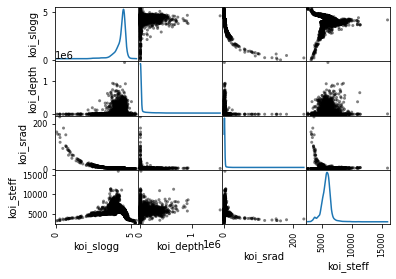

In [100]:
# fb = f.loc[:,['koi_srad','koi_slogg']]  近似反比例
fbx = f.loc[:,['koi_slogg','koi_depth','koi_srad','koi_steff']]

# koi_srad    ra    dec    koi_slogg  koi_steff   koi_depth   koi_duration
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(fbx, diagonal='kde', color='k')
plt.show()

In [101]:
# 空值判断
fb.isnull().any()

koi_depth    True
koi_steff    True
dtype: bool

看到有很多空值，会对模型产生比较大的影响,如果用均值等等都会对实验结果真实性有影响，我们之间删除相关行的数据

In [102]:
fb = fb.dropna()
fb.reset_index(drop=True,inplace=True)
fb

,koi_depth,koi_steff
0,615.8,5455.0
1,874.8,5455.0
2,10829.0,5853.0
3,8079.2,5805.0
4,603.3,6031.0
...,...,...
9196,87.7,5638.0
9197,1579.2,5638.0
9198,48.5,6119.0
9199,103.6,6173.0


看到koi_score和koi_slogg大致的线性关系，尝试对score和slogg整合进行线性回归,

数据变成7000多条数据

下面尝试建模

In [103]:
import numpy as np

dataSet_x = fb.iloc[:,[0]].values
dataSet_y = fb.iloc[:,[1]].values

print(dataSet_x)
maxX = float(max(dataSet_x))
minX = float(min(dataSet_x))
X = np.arange(minX,maxX).reshape([-1,1])

[[  615.8]
 [  874.8]
 [10829. ]
 ...
 [   48.5]
 [  103.6]
 [   76.7]]


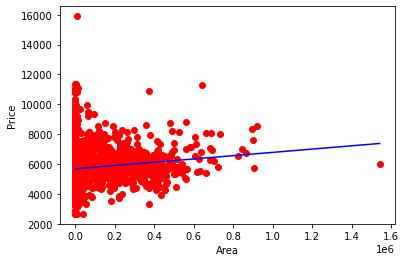

In [104]:
from sklearn import linear_model

linear = linear_model.LinearRegression()
linear.fit(dataSet_x, dataSet_y)

# 图像中显示
plt.scatter(dataSet_x, dataSet_y, color = 'red')
plt.plot(X, linear.predict(X), color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## 多项式回归

在一元回归分析中，如果依变量y与自变量x的关系为非线性的，但
是又找不到适当的函数曲线来拟合，则可以采用一元多项式回归。

多项式回归(Polynomial Regression)是研究一个因变量与一
个或多个自变量间多项式的回归分析方法。如果自变量只有一个
时，称为一元多项式回归；如果自变量有多个时，称为多元多项
式回归。

 多项式回归的最大优点就是可以通过增加x的高次项对实测点进行逼
近，直至满意为止。

 事实上，多项式回归可以处理相当一类非线性问题，它在回归分析
中占有重要的地位，因为任一函数都可以分段用多项式来逼近

### 技术路线

**sklearn.preprocessing.PolynomialFeatures**

In [107]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
fbc = f.loc[:,['koi_srad','koi_slogg']]
fbc

,koi_srad,koi_slogg
0,0.927,4.467
1,0.927,4.467
2,0.868,4.544
3,0.791,4.564
4,1.046,4.438
...,...,...
9559,1.088,4.296
9560,0.903,4.529
9561,1.031,4.444
9562,1.041,4.447


同理我们进行建模和预处理

[[0.927]
 [0.927]
 [0.868]
 ...
 [1.031]
 [1.041]
 [1.193]]


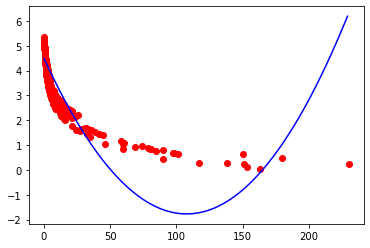

In [106]:
fbc = fbc.dropna()
fbc.reset_index(drop=True,inplace=True)

dataSet_x = fbc.iloc[:,[0]].values.reshape([len(dataSet_x),1])
dataSet_y = fbc.iloc[:,[1]].values


print(dataSet_x)
maxX = float(max(dataSet_x))
minX = float(min(dataSet_x))
X = np.arange(minX,maxX).reshape([-1,1])


poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(dataSet_x)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, dataSet_y)

plt.scatter(dataSet_x, dataSet_y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
# plt.xlabel('Area')
# plt.ylabel('Price')
plt.show()